In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
import numpy as np
import polars as pl
from numba import njit
from glob import glob
import os
import matplotlib.pyplot as plt
import datetime

In [ ]:
# Unzip part
!tar -xvf "/content/drive/MyDrive/FBD/US_flash_crash.tar" -C "/content/FBD"

流式输出内容被截断，只能显示最后 5000 行内容。
US_flash_crash/trade/UTX.N/2010-04-01-UTX.N-trade.parquet
US_flash_crash/trade/UTX.N/2010-04-05-UTX.N-trade.parquet
US_flash_crash/trade/UTX.N/2010-04-06-UTX.N-trade.parquet
US_flash_crash/trade/UTX.N/2010-04-07-UTX.N-trade.parquet
US_flash_crash/trade/UTX.N/2010-04-08-UTX.N-trade.parquet
US_flash_crash/trade/UTX.N/2010-04-09-UTX.N-trade.parquet
US_flash_crash/trade/UTX.N/2010-04-12-UTX.N-trade.parquet
US_flash_crash/trade/UTX.N/2010-04-13-UTX.N-trade.parquet
US_flash_crash/trade/UTX.N/2010-04-14-UTX.N-trade.parquet
US_flash_crash/trade/UTX.N/2010-04-15-UTX.N-trade.parquet
US_flash_crash/trade/UTX.N/2010-04-16-UTX.N-trade.parquet
US_flash_crash/trade/UTX.N/2010-04-19-UTX.N-trade.parquet
US_flash_crash/trade/UTX.N/2010-04-20-UTX.N-trade.parquet
US_flash_crash/trade/UTX.N/2010-04-21-UTX.N-trade.parquet
US_flash_crash/trade/UTX.N/2010-04-22-UTX.N-trade.parquet
US_flash_crash/trade/UTX.N/2010-04-23-UTX.N-trade.parquet
US_flash_crash/trade/UTX.N/2010-04-26-UTX.N-t

In [ ]:
df_bbo = pl.read_parquet("/content/FBD/US_flash_crash/bbo/AAPL.OQ/2010-01-04-AAPL.OQ-bbo.parquet")
df_QQ = pl.read_parquet("/content/FBD/US_flash_crash/trade/AAPL.OQ/2010-01-04-AAPL.OQ-trade.parquet")
df_N = pl.read_parquet("/content/FBD/US_flash_crash/trade/ABT.N/2010-01-04-ABT.N-trade.parquet")

In [ ]:
df_bbo

xltime,bid-price,bid-volume,ask-price,ask-volume
f64,f64,i32,f64,i32
40182.500345,0.0,0,213.0,10
40182.50068,211.86,5,213.0,10
40182.500752,0.0,0,213.0,10
40182.500752,211.83,5,213.0,10
40182.500783,0.0,0,213.0,10
…,…,…,…,…
40182.99666,214.84,4,214.88,3
40182.99791,214.84,4,214.89,10
40182.998061,214.84,4,214.89,2


In [ ]:
df_QQ

xltime,trade-price,trade-volume,trade-stringflag,trade-rawflag
f64,f64,i32,str,str
40182.504256,212.98,200,"""marketclosed|volumeupdate""","""[GV4_TEXT ]@ T …"
40182.50512,213.0,380,"""marketclosed|volumeupdate""","""[GV4_TEXT ]@FT …"
40182.506477,213.0,500,"""marketclosed|volumeupdate""","""[GV4_TEXT ]@FT …"
40182.512178,213.0,256,"""marketclosed|volumeupdate""","""[GV4_TEXT ]@ T …"
40182.518911,212.65,100,"""marketclosed|volumeupdate""","""[GV4_TEXT ]@ T …"
…,…,…,…,…
40182.995177,214.88,300,"""marketclosed|volumeupdate""","""[GV4_TEXT ]@FT …"
40182.99791,214.88,322,"""marketclosed|volumeupdate""","""[GV4_TEXT ]@ T …"
40182.99791,214.88,378,"""marketclosed|volumeupdate""","""[GV4_TEXT ]@ T …"


In [ ]:
df_N

xltime,trade-price,trade-volume,trade-stringflag,trade-rawflag
f64,f64,i32,str,str
40182.604358,54.11,78600,"""blocktrade|auction""","""[CTS_QUAL ]O …"
40182.604359,54.11,100,"""uncategorized""","""[CTS_QUAL ] …"
40182.604364,54.1,100,"""uncategorized""","""[CTS_QUAL ]MSW …"
40182.604445,54.15,600,"""uncategorized""","""[CTS_QUAL ] …"
40182.604484,54.1,300,"""uncategorized""","""[CTS_QUAL ] …"
…,…,…,…,…
40182.874947,54.48,100,"""uncategorized""","""[CTS_QUAL ] …"
40182.874947,54.49,700,"""uncategorized""","""[CTS_QUAL ] …"
40182.87495,54.49,100,"""uncategorized""","""[CTS_QUAL ] …"


In [ ]:
### BBO
@njit
def fast_vol_decomposition(returns):
    n = len(returns)
    if n < 2: return 0.0, 0.0
    rv = np.sum(returns**2)
    abs_ret = np.abs(returns)
    sum_prod = 0.0
    for i in range(1, n):
        sum_prod += abs_ret[i] * abs_ret[i-1]
    constant = 1.57079632679 # pi/2
    bv = constant * (n / (n - 1)) * sum_prod
    return rv, bv

def apply_vol_decomp(s: pl.Series) -> pl.Series:
    arr = s.to_numpy().astype(np.float64)
    arr = arr[~np.isnan(arr)]
    rv, bv = fast_vol_decomposition(arr)
    return pl.Series([rv, bv])


def min_time(df_raw: pl.DataFrame) -> pl.DataFrame:
    df = df_raw.with_columns([
    ((pl.col("xltime") - 25569) * 86400 * 1000).cast(pl.Datetime("ms")).alias("utc_time")
]).with_columns([

    pl.col("utc_time")
    .dt.replace_time_zone("UTC")
    .dt.convert_time_zone("America/New_York")
    .dt.replace_time_zone(None)
    .alias("timestamp")
])
    df = df.filter(
        (pl.col("bid-price") > 0.01) & (pl.col("ask-price") > pl.col("bid-price"))
    ).with_columns([
        ((pl.col("bid-price") + pl.col("ask-price")) / 2).alias("mid_price")
    ]).sort("timestamp")

    df = df.with_columns([
        pl.col("bid-price").diff().alias("db"),
        pl.col("bid-volume").diff().alias("dv_b"),
        pl.col("ask-price").diff().alias("da"),
        pl.col("ask-volume").diff().alias("dv_a")
    ]).with_columns([
        pl.when(pl.col("db") > 0).then(pl.col("bid-volume"))
          .when(pl.col("db") < 0).then(-pl.col("bid-volume"))
          .otherwise(pl.col("dv_b")).alias("bid_pressure"),
        pl.when(pl.col("da") > 0).then(-pl.col("ask-volume"))
          .when(pl.col("da") < 0).then(pl.col("ask-volume"))
          .otherwise(-pl.col("dv_a")).alias("ask_pressure")
    ]).with_columns([
        (pl.col("bid_pressure") + pl.col("ask_pressure")).alias("tick_ofi")
    ])

    df = df.with_columns([
        (pl.col("bid-volume") + pl.col("ask-volume")).alias("total_depth"),
        pl.col("mid_price").log().diff().fill_null(0).alias("tick_ret"),
        ((pl.col("ask-price") - pl.col("bid-price")) / pl.col("mid_price")).alias("rel_spread")
    ]).with_columns([
        (pl.col("mid_price") * pl.col("total_depth")).alias("weighted_mid")
    ])

    df_min = (
        df.group_by_dynamic("timestamp", every="1m", closed="right", label="right")
        .agg([
            (pl.col("weighted_mid").sum() / pl.col("total_depth").sum()).alias("price"),
            pl.col("tick_ofi").sum().alias("minute_ofi"),
            ((pl.col("rel_spread") * pl.col("total_depth")).sum() / pl.col("total_depth").sum()).alias("avg_spread"),
            pl.col("tick_ret").map_batches(apply_vol_decomp).alias("vol_metrics"),
            pl.len().alias("tick_count")
        ])
    )

    df_min = df_min.with_columns([
        pl.col("vol_metrics").list.get(0).alias("rv"),
        pl.col("vol_metrics").list.get(1).alias("bv")
    ]).with_columns([
        (pl.when(pl.col("rv") > pl.col("bv"))
           .then(pl.col("rv") - pl.col("bv"))
           .otherwise(0.0)).alias("jump_comp")
    ]).drop("vol_metrics")
    df_min = df_min.filter(
        (pl.col("timestamp").dt.time() >= datetime.time(9, 30)) &
        (pl.col("timestamp").dt.time() <= datetime.time(16, 0))
    )
    return df_min

In [ ]:
BASE_PATH = "/content/FBD/US_flash_crash/bbo"
STOCKS = os.listdir(BASE_PATH)

DATES = ["2010-04-29", "2010-04-30", "2010-05-03", "2010-05-04", "2010-05-05", "2010-05-06"]
#DATES = ["2010-03-08", "2010-03-09", "2010-03-10", "2010-03-11", "2010-03-12", "2010-03-15"]
#DATES = ["2010-10-08","2010-10-11", "2010-10-12", "2010-10-13", "2010-10-14", "2010-10-15"]

def get_stock_minute_signals(stock_id, DATES = DATES, target_date = pl.date(2010, 5, 6)):
    files = []
    for d in DATES:
        p = os.path.join(BASE_PATH, stock_id, f"{d}-{stock_id}-bbo.parquet")
        if os.path.exists(p): files.append(p)

    if len(files) < 6: return None

    df_raw = pl.read_parquet(files)
    df_min = min_time(df_raw)

    df_history = df_min.filter(pl.col("timestamp").dt.date() < target_date)
    df_target = df_min.filter(pl.col("timestamp").dt.date() == target_date)

    if df_history.height == 0 or df_target.height == 0:
        return None

    stats = df_history.select([
        pl.col("minute_ofi").std().alias("hist_ofi_std"),
        pl.col("avg_spread").median().alias("hist_spread_med")
    ])

    ofi_std_baseline = stats[0, "hist_ofi_std"]
    spread_med_baseline = stats[0, "hist_spread_med"]

    return df_target.select([
        "timestamp",
        pl.lit(stock_id).alias("symbol"),
        ((pl.col("minute_ofi").abs() > 3 * ofi_std_baseline) &
         (pl.col("avg_spread") > 5 * spread_med_baseline)).cast(pl.Int8).alias("signal")
    ])

In [ ]:
stock_list = [f for f in os.listdir(BASE_PATH) if os.path.isdir(os.path.join(BASE_PATH, f))]
all_results = []
for stock in stock_list:
    sig = get_stock_minute_signals(stock)
    if sig is not None: all_results.append(sig)

df_final = pl.concat(all_results).pivot(
    index="timestamp", on="symbol", values="signal"
).sort("timestamp").fill_null(0)

m_signals = df_final.select(pl.exclude("timestamp")).to_numpy()
bt_series_bbo = np.mean(m_signals, axis=1)

timestamps_bbo = df_final["timestamp"].to_numpy()

In [ ]:
# plt.figure(figsize=(15, 6))
# plt.plot(timestamps_bbo, bt_series_bbo, label="Market Resonance $B_t$", color='red', linewidth=1.5)
# plt.axhline(y=0.05, color='gray', linestyle='--', label="Significance Threshold (5%)")
# plt.axhline(y=0.10, color='black', linestyle=':', label="Flash Crash Threshold (10%)")

# plt.title("2010-05-06 Market-wide Resonance Indicator ($B_t$)")
# plt.ylabel("Percentage of Stocks Triggering Signals")
# plt.xlabel("Time")
# plt.legend()
# plt.grid(True, alpha=0.3)
# plt.show()


In [ ]:
def min_QQ(df_raw: pl.DataFrame) -> pl.DataFrame:

    df = df_raw.with_columns([
        ((pl.col("xltime") - 25569) * 86400 * 1000)
        .cast(pl.Datetime("ms"))
        .dt.replace_time_zone("UTC")
        .dt.convert_time_zone("America/New_York")
        .dt.replace_time_zone(None)
        .alias("timestamp"),
        pl.col("trade-price").alias("price_val"),
        pl.col("trade-volume").alias("v_i")
    ]).sort("timestamp")

    df = df.filter(
        pl.col("timestamp").dt.time().is_between(datetime.time(9, 30), datetime.time(16, 0))
    )


    df = df.with_columns([
        pl.col("price_val").log()
        .diff()
        .over(pl.col("timestamp").dt.date())
        .fill_null(0)
        .alias("tick_ret")
    ])

    df_min = (
        df.group_by_dynamic(
            "timestamp",
            every="1m",
            closed="left",
            label="left",
            start_by="window"
        )
        .agg([
            ((pl.col("price_val") * pl.col("v_i")).sum() / pl.col("v_i").sum()).alias("price"),
            pl.col("v_i").sum().alias("minute_volume"),
            pl.col("tick_ret").map_batches(apply_vol_decomp).alias("vol_metrics"),
            pl.len().alias("trade_count")
        ])
    )

    df_min = df_min.with_columns([
        pl.col("vol_metrics").list.get(0).alias("rv"),
        pl.col("vol_metrics").list.get(1).alias("bv")
    ]).drop("vol_metrics")

    return df_min

In [ ]:
TRADE_BASE_PATH= "/content/FBD/US_flash_crash/trade"

def get_trade_market_signals(stock_id, DATES=DATES, target_date=pl.date(2010, 5, 6)):
    files = [os.path.join(TRADE_BASE_PATH, stock_id, f"{d}-{stock_id}-trade.parquet") for d in DATES]
    valid_files = [f for f in files if os.path.exists(f)]

    if len(valid_files) < 6: return None

    dfs = []
    for f in valid_files:
        d = pl.read_parquet(f).with_columns([
            pl.col("trade-volume").cast(pl.Float64),
            pl.col("trade-price").cast(pl.Float64)
        ])
        dfs.append(d)

    df_raw = pl.concat(dfs, how="vertical_relaxed")
    df_min = min_QQ(df_raw)

    df_min = df_min.with_columns([
        pl.col("timestamp").dt.date().alias("date")
    ]).with_columns([
        pl.col("price").log()
        .diff()
        .over("date")
        .fill_null(0)
        .alias("log_ret")
    ])
    df_history = df_min.filter(pl.col("date") < target_date)
    df_target = df_min.filter(pl.col("date") == target_date)

    if df_history.height == 0 or df_target.height == 0:
        return None

    hist_bv_mu = df_history.select(pl.col("bv").mean()).item()
    if hist_bv_mu <= 0: hist_bv_mu = 1e-9

    res = df_target.with_columns([
        (pl.col("log_ret").abs() / (hist_bv_mu**0.5)).alias("LM_stat")
    ]).fill_null(0)

    market_name = "Nasdaq" if stock_id.endswith(".OQ") else "NYSE"
    return res.select([
        "timestamp",
        pl.lit(stock_id).alias("symbol"),
        pl.lit(market_name).alias("market"),
        (pl.col("LM_stat") > 5.0).cast(pl.Int8).alias("signal_trade")
    ])

In [ ]:
trade_stock_list = [f for f in os.listdir(TRADE_BASE_PATH) if os.path.isdir(os.path.join(TRADE_BASE_PATH, f))]

all_trade_results = []
for stock in trade_stock_list:
    sig = get_trade_market_signals(stock)
    if sig is not None and sig.height > 0:
        all_trade_results.append(sig)

df_final_trade = pl.concat(all_trade_results).pivot(
    index="timestamp", on="symbol", values="signal_trade"
).sort("timestamp").fill_null(0)
timestamps_trade = df_final_trade.select("timestamp").to_numpy().flatten()
m_trade = df_final_trade.select(pl.exclude("timestamp", "market")).to_numpy()
bt_trade_series = np.mean(m_trade, axis=1)

In [ ]:
# def smooth_series(series_data, window=3):
#     s = pl.Series(series_data)
#     return s.rolling_mean(window_size=window, center=True).fill_null(0).to_numpy()


# bt_trade_smooth = smooth_series(bt_trade_series, window=3)
# bt_bbo_smooth = smooth_series(bt_series_bbo, window=3)

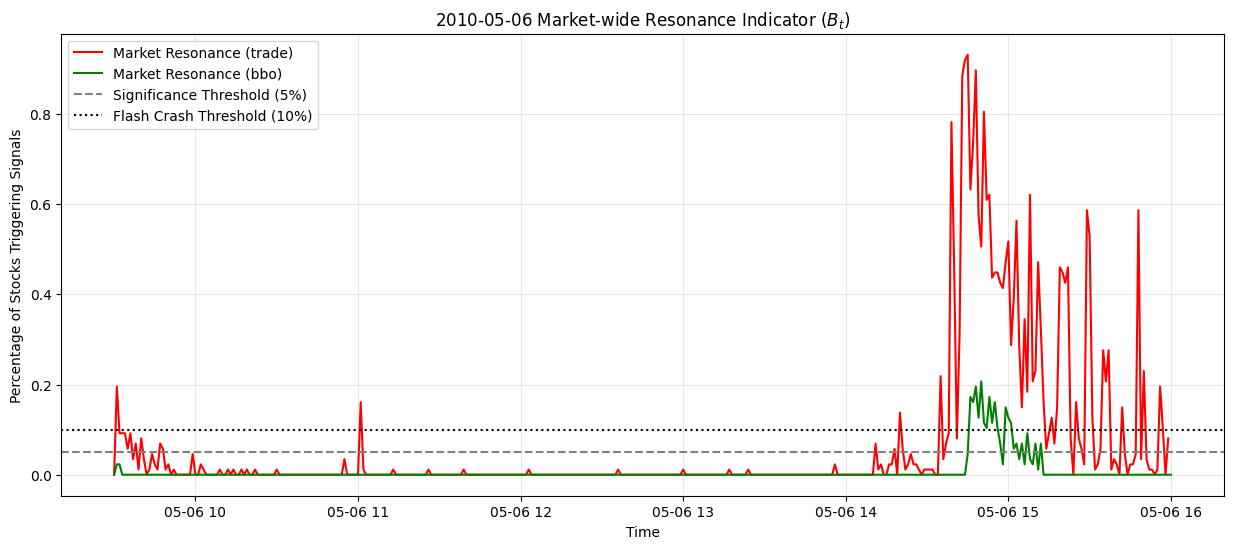

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(timestamps_trade, bt_trade_series, label="Market Resonance (trade)", color='red', linewidth=1.5)
plt.plot(timestamps_bbo, bt_series_bbo, label="Market Resonance (bbo)", color='green', linewidth=1.5)
plt.axhline(y=0.05, color='gray', linestyle='--', label="Significance Threshold (5%)")
plt.axhline(y=0.10, color='black', linestyle=':', label="Flash Crash Threshold (10%)")

plt.title("2010-05-06 Market-wide Resonance Indicator ($B_t$)")
plt.ylabel("Percentage of Stocks Triggering Signals")
plt.xlabel("Time")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

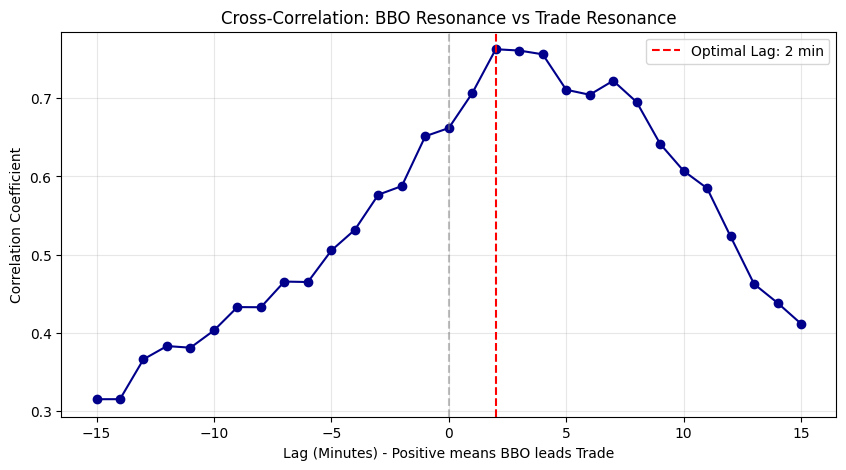

最大相关系数: 0.7629
最优领先时间: 2 分钟


In [ ]:
df_sync = pl.DataFrame({
    "timestamp": timestamps_trade,
    "bt_trade": bt_trade_series
}).join(
    pl.DataFrame({
        "timestamp": timestamps_bbo,
        "bt_bbo": bt_series_bbo
    }),
    on="timestamp",
    how="inner"
).sort("timestamp")


s_trade_aligned = df_sync["bt_trade"].to_numpy()
s_bbo_aligned = df_sync["bt_bbo"].to_numpy()
n_samples = len(s_trade_aligned)

lags = np.arange(-15, 16)
correlations = []


for lag in lags:
    if lag < 0:

        corr = np.corrcoef(s_trade_aligned[-lag:], s_bbo_aligned[:lag])[0, 1]
    elif lag > 0:

        corr = np.corrcoef(s_trade_aligned[:-lag], s_bbo_aligned[lag:])[0, 1]
    else:
        corr = np.corrcoef(s_trade_aligned, s_bbo_aligned)[0, 1]
    correlations.append(corr)


max_idx = np.argmax(correlations)
optimal_lag = lags[max_idx]
max_corr = correlations[max_idx]

plt.figure(figsize=(10, 5))
plt.plot(lags, correlations, marker='o', color='darkblue')
plt.axvline(x=0, color='gray', linestyle='--', alpha=0.5)
plt.axvline(x=optimal_lag, color='red', linestyle='--', label=f'Optimal Lag: {optimal_lag} min')
plt.title("Cross-Correlation: BBO Resonance vs Trade Resonance")
plt.xlabel("Lag (Minutes) - Positive means BBO leads Trade")
plt.ylabel("Correlation Coefficient")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Max corrlation: {max_corr:.4f}")
print(f"Best lag: {optimal_lag} 分钟")

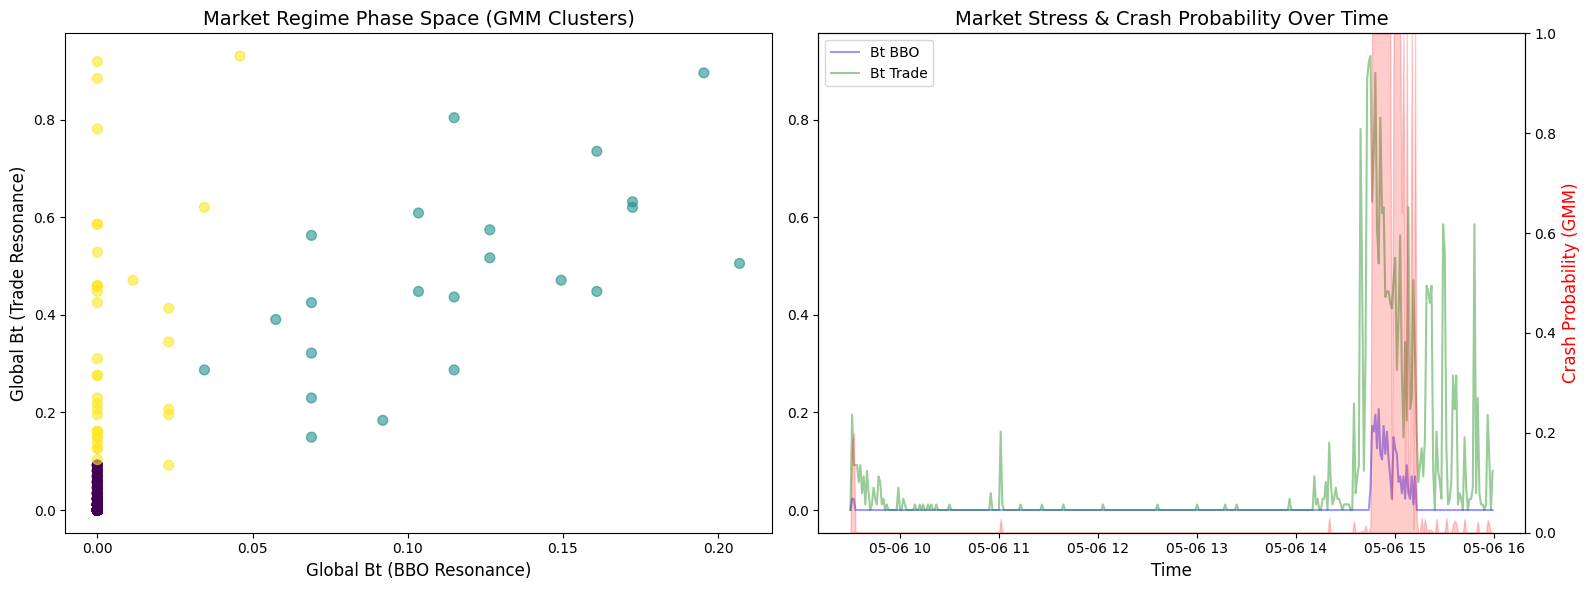

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

def plot_market_regime_analysis(bt_bbo, bt_trade, timestamps):

    bt_bbo = np.array(bt_bbo)
    bt_trade = np.array(bt_trade)
    timestamps = np.array(timestamps)

    X = np.column_stack([bt_bbo, bt_trade])
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
    labels = gmm.fit_predict(X_scaled)
    probs = gmm.predict_proba(X_scaled)

    crash_id = np.argmax(np.sum(gmm.means_, axis=1))
    crash_probs = probs[:, crash_id]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    scatter = ax1.scatter(bt_bbo, bt_trade, c=labels, cmap='viridis', alpha=0.6, s=50)
    ax1.set_xlabel('Global Bt (BBO Resonance)', fontsize=12)
    ax1.set_ylabel('Global Bt (Trade Resonance)', fontsize=12)
    ax1.set_title('Market Regime Phase Space (GMM Clusters)', fontsize=14)

    ax2.plot(timestamps, bt_bbo, label='Bt BBO', color='blue', alpha=0.4)
    ax2.plot(timestamps, bt_trade, label='Bt Trade', color='green', alpha=0.4)

    ax2_prob = ax2.twinx()
    ax2_prob.fill_between(timestamps, 0, crash_probs, color='red', alpha=0.2, label='Crash Probability')
    ax2_prob.set_ylabel('Crash Probability (GMM)', color='red', fontsize=12)
    ax2_prob.set_ylim(0, 1)

    ax2.set_title('Market Stress & Crash Probability Over Time', fontsize=14)
    ax2.set_xlabel('Time', fontsize=12)
    ax2.legend(loc='upper left')

    plt.tight_layout()
    plt.show()


plot_market_regime_analysis(df_sync["bt_bbo"], df_sync["bt_trade"], df_sync["timestamp"])

In [ ]:
!pip install signatory

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for signatory: filename=signatory-1.2.6.1.9.0-cp312-cp312-linux_x86_64.whl size=13020376 sha256=b614ae3e804770772a20b69b7990e7f3ea9a42d15d1f2eb91c0aabc8b44c0349
  Stored in directory: /root/.cache/pip/wheels/ea/18/f4/25aee915ecc6b29d1a54962265ca510a889b7ea71905f446b5
Successfully built signatory


In [ ]:
import torch
import signatory

def compute_levy_batch_gpu(tick_paths_list, h_p_mu, h_v_mu=None):

    if not tick_paths_list:
        return np.array([], dtype=np.float64)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    max_ticks = max(len(p) for p in tick_paths_list)
    batch_size = len(tick_paths_list)

    padded_input = np.zeros((batch_size, max_ticks, 2))

    for i, path in enumerate(tick_paths_list):
        n_ticks = len(path)

        padded_input[i, :n_ticks, 0] = (path[:, 0] / h_p_mu - 1)

        total_v = np.sum(path[:, 1])
        if total_v > 1e-9:
            padded_input[i, :n_ticks, 1] = np.cumsum(path[:, 1]) / total_v
        else:
            padded_input[i, :n_ticks, 1] = 0

    path_tensor = torch.tensor(padded_input, dtype=torch.float32).to(device)

    sigs = signatory.signature(path_tensor, depth=2)

    levy_areas = torch.abs(sigs[:, 3] - sigs[:, 4]) * 0.5

    return levy_areas.cpu().numpy()

def get_trade_path_signature_signals_tick_gpu_fixed(stock_id, DATES, target_date=pl.date(2010, 5, 6)):
    files = [os.path.join(TRADE_BASE_PATH, stock_id, f"{d}-{stock_id}-trade.parquet") for d in DATES]
    valid_files = [f for f in files if os.path.exists(f)]
    if not valid_files: return None

    df_all = pl.concat([pl.read_parquet(f) for f in valid_files], how="vertical_relaxed")

    df_all = df_all.with_columns([
        ((pl.col("xltime") - 25569) * 86400 * 1000)
        .cast(pl.Datetime("ms"))
        .dt.replace_time_zone("UTC")
        .dt.convert_time_zone("America/New_York")
        .dt.replace_time_zone(None)
        .alias("timestamp"),
        pl.col("trade-price").cast(pl.Float64),
        pl.col("trade-volume").cast(pl.Float64)
    ])

    df_all = df_all.with_columns([
        pl.col("timestamp").dt.cast_time_unit("us"),
        pl.col("timestamp").dt.date().alias("date"),
        pl.col("timestamp").dt.truncate("1m").alias("minute_ts")
    ])

    df_all = df_all.filter(
        pl.col("timestamp").dt.time().is_between(datetime.time(9, 30), datetime.time(16, 0))
    )

    df_hist = df_all.filter(pl.col("date") < target_date)
    df_target = df_all.filter(pl.col("date") == target_date).sort("timestamp")

    if df_hist.height < 100 or df_target.height < 10: return None

    h_p_mu = df_hist["trade-price"].mean()
    h_v_mu = df_hist.group_by("minute_ts").agg(pl.col("trade-volume").sum())["trade-volume"].mean()
    hist_groups = df_hist.group_by("minute_ts").agg([
        pl.col("trade-price"),
        pl.col("trade-volume")
    ])
    hist_paths = [np.column_stack([p.to_numpy(), v.to_numpy()])
                  for p, v in zip(hist_groups["trade-price"], hist_groups["trade-volume"])]

    hist_levy_values = compute_levy_batch_gpu(hist_paths, h_p_mu, h_v_mu)

    levy_mu = np.mean(hist_levy_values)
    levy_std = np.std(hist_levy_values)
    threshold = levy_mu+8*levy_std

    target_groups = df_target.group_by("minute_ts", maintain_order=True).agg([
        pl.col("trade-price"),
        pl.col("trade-volume")
    ])

    if target_groups.height == 0: return None

    tick_paths = [np.column_stack([p.to_numpy(), v.to_numpy()])
                  for p, v in zip(target_groups["trade-price"], target_groups["trade-volume"])]

    levy_values = compute_levy_batch_gpu(tick_paths, h_p_mu, h_v_mu)

    return pl.DataFrame({
        "timestamp": target_groups["minute_ts"],
        "symbol": [stock_id] * len(levy_values),
        "levy_val": levy_values
    }).with_columns([
        (pl.col("levy_val") > threshold).cast(pl.Int8).alias("signal_path")
    ])

all_path_results_gpu = []
for stock in trade_stock_list:
    sig = get_trade_path_signature_signals_tick_gpu_fixed(stock, DATES)
    if sig is not None:
        all_path_results_gpu.append(sig)

if all_path_results_gpu:

    df_final_path = pl.concat(all_path_results_gpu).pivot(
        index="timestamp",
        on="symbol",
        values="signal_path"
    ).sort("timestamp").fill_null(0)

    timestamps_path = df_final_path["timestamp"].to_numpy()
    m_path = df_final_path.select(pl.exclude("timestamp")).to_numpy()
    bt_path_series = np.mean(m_path, axis=1)


GPU 加速 Tick 路径指标计算完成。


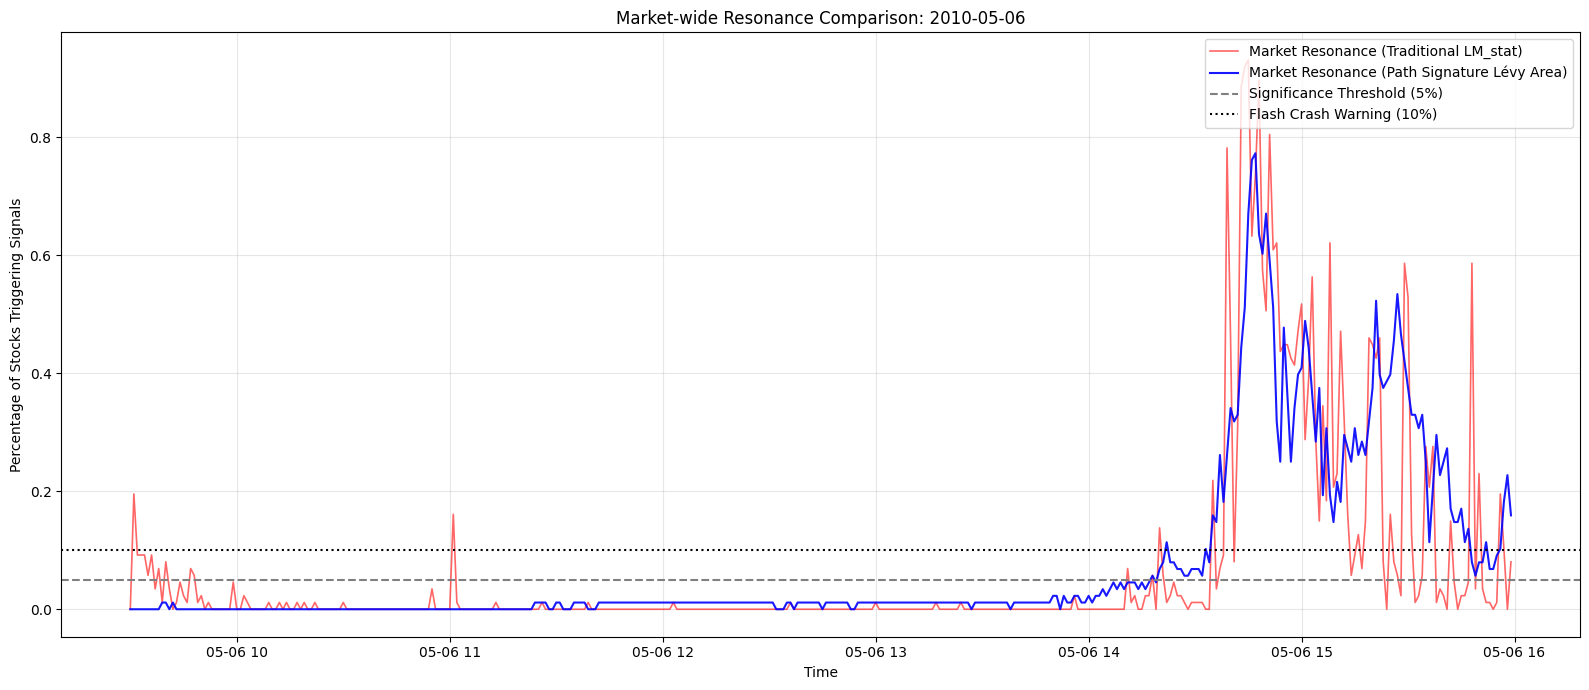

In [ ]:
def plot_resonance_comparison(timestamps_trade, bt_trade, timestamps_path, bt_path, target_date):
    plt.figure(figsize=(16, 7))

    plt.plot(timestamps_trade, bt_trade,
             label='Market Resonance (Traditional LM_stat)',
             color='red', alpha=0.6, linewidth=1.2)

    plt.plot(timestamps_path, bt_path,
             label='Market Resonance (Path Signature Lévy Area)',
             color='blue', alpha=0.9, linewidth=1.5)


    plt.axhline(y=0.05, color='gray', linestyle='--', label='Significance Threshold (5%)')
    plt.axhline(y=0.10, color='black', linestyle=':', label='Flash Crash Warning (10%)')

    plt.title(f"Market-wide Resonance Comparison: {target_date}")
    plt.xlabel("Time")
    plt.ylabel("Percentage of Stocks Triggering Signals")
    plt.legend(loc='upper right')
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

plot_resonance_comparison(timestamps_trade, bt_trade_series, timestamps_path, bt_path_series, "2010-05-06")